#Credit Scoring: Predict the probability of going default 
    Algorithm: Support Vector Machine (10 features with 1 target)

    Data: https://www.kaggle.com/c/GiveMeSomeCredit
    
    By: Hee Kyung, Yoon

In [1]:
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 0. LOAD DATA
    1. load data
    2. check data

## 1. PROCESS DATA (-> X, y)
    1. split data into training, cross validation and test data sets
    2. splitData to X & y
    3. featureScale


## 2. BUILD FIRST MODEL
    1. Train   
    2. Predict

## 3. EVALUATE MODEL
    Learning Curve
    
## 4. MODIFY MODEL
    1. Add polynomial features
    2. Modify C (regularization term)
    3. Modify Threshold
    4. Modified Model

----------------------------------------------------------------------------------------------------------------------------------------------------

# 0. LOAD DATA
    1. load data
    2. check data

In [2]:
def load(filename):
    '''
    filenname: string ('test.csv')
    
    returns: DataFrame
    '''
    data = pd.DataFrame.from_csv(filename, encoding = 'utf-8')
    print '\nData Columns:'
    for i in range(len(data.columns)):
        print '\t',i,'\t', data.columns[i]

    check(data)
    
    return data

def check(X):
    '''
    X: DataFrame or Series
    
        prints shape and head
    
    returns: None
    '''
    print '\nShape is:\n', X.shape
    print X.head()

data = load('cs-training.csv')


Data Columns:
	0 	SeriousDlqin2yrs
	1 	RevolvingUtilizationOfUnsecuredLines
	2 	age
	3 	NumberOfTime30-59DaysPastDueNotWorse
	4 	DebtRatio
	5 	MonthlyIncome
	6 	NumberOfOpenCreditLinesAndLoans
	7 	NumberOfTimes90DaysLate
	8 	NumberRealEstateLoansOrLines
	9 	NumberOfTime60-89DaysPastDueNotWorse
	10 	NumberOfDependents

Shape is:
(150000, 11)
   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                 1                              0.766127   45   
2                 0                              0.957151   40   
3                 0                              0.658180   38   
4                 0                              0.233810   30   
5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     2   0.802982           9120   
2                                     0   0.121876           2600   
3                                     1   0.085113  

#1. PROCESS DATA (-> X, y)
    1. split data into Training, Cross validation & Test sets
    2. splitData to X & y
    3. featureScale

In [3]:
# 1. Split data into training data, cross validation data, and test data

import random

'''
# Shuffle index
index = np.array(data.index)
random.shuffle(index)

print index.shape
print index

# training set (60%)
trainingSize = data.shape[0] * 0.60
training = data.ix[index[:trainingSize]]

training.to_csv('training.csv', encoding='utf-8')

print '\n', training.shape
print training.head()

# crossValidation set (20%)
crossValSize = data.shape[0] * 0.20
crossValidation = data.ix[index[trainingSize:trainingSize + crossValSize]]

crossValidation.to_csv('crossValidation.csv', encoding='utf-8')

print '\n', crossValidation.shape

# test set (20%)
test = data.ix[index[trainingSize + crossValSize:]]

test.to_csv('test.csv', encoding = 'utf-8')

print '\n', crossValidation.shape
'''

"\n# Shuffle index\nindex = np.array(data.index)\nrandom.shuffle(index)\n\nprint index.shape\nprint index\n\n# training set (60%)\ntrainingSize = data.shape[0] * 0.60\ntraining = data.ix[index[:trainingSize]]\n\ntraining.to_csv('training.csv', encoding='utf-8')\n\nprint '\n', training.shape\nprint training.head()\n\n# crossValidation set (20%)\ncrossValSize = data.shape[0] * 0.20\ncrossValidation = data.ix[index[trainingSize:trainingSize + crossValSize]]\n\ncrossValidation.to_csv('crossValidation.csv', encoding='utf-8')\n\nprint '\n', crossValidation.shape\n\n# test set (20%)\ntest = data.ix[index[trainingSize + crossValSize:]]\n\ntest.to_csv('test.csv', encoding = 'utf-8')\n\nprint '\n', crossValidation.shape\n"

In [3]:
# load split data

training = load('training_10000.csv')
cv = load('crossValidation.csv')
test = load('test.csv')


Data Columns:
	0 	SeriousDlqin2yrs
	1 	RevolvingUtilizationOfUnsecuredLines
	2 	age
	3 	NumberOfTime30-59DaysPastDueNotWorse
	4 	DebtRatio
	5 	MonthlyIncome
	6 	NumberOfOpenCreditLinesAndLoans
	7 	NumberOfTimes90DaysLate
	8 	NumberRealEstateLoansOrLines
	9 	NumberOfTime60-89DaysPastDueNotWorse
	10 	NumberOfDependents

Shape is:
(10000, 11)
        SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
42082                  1                              1.173509   33   
47463                  0                              0.040118   67   
6412                   0                              0.228882   68   
142967                 0                              0.558521   50   
51191                  0                              0.000000   65   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
42082                                      3   0.430443           5570   
47463                                      0   0.007237          10500   
6412    

In [4]:
# 2. splitData to X & y

def splitData(Xandy):
    '''
    Xandy:
    
    returns: X, y
    '''
    X = Xandy.iloc[:, 1:]
    #check(Xtrain)

    y = Xandy['SeriousDlqin2yrs']
    #check(ytrain)
    
    # fill nan with 0
    X = X.fillna(0)
    y = y.fillna(0)
    return X, y



# 3. feature scaling X
def featureScale(X):
    '''
    X: DataFrame
    
    returns: DataFrame (feature scaled)
    '''
    for col in range(X.shape[1]):
        #print 'col index:', col
        copied = X.iloc[:, col]
        #print 'head\n', copied.head()
        #print 'mean: ', copied.mean()
        #print 'std: ', copied.std()
        X.iloc[:, col] = (copied - copied.mean())/copied.std()
    return X

In [5]:
Xtrain, ytrain = splitData(training)
Xtrain = featureScale(Xtrain)
check(Xtrain)

Xcv, ycv = splitData(cv)
Xcv = featureScale(Xcv)

Xtest, ytest = splitData(test)
Xtest = featureScale(Xtest)


Shape is:
(10000, 10)
        RevolvingUtilizationOfUnsecuredLines       age  \
42082                              -0.025415 -1.300346   
47463                              -0.033496  0.985764   
6412                               -0.032150  1.053002   
142967                             -0.029800 -0.157291   
51191                              -0.033782  0.851287   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
42082                               0.703255  -0.300389       0.001775   
47463                              -0.102829  -0.300789       0.259276   
6412                               -0.102829  -0.300666      -0.086914   
142967                             -0.102829  -0.300596       0.379408   
51191                              -0.102829  -0.300789      -0.093286   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
42082                          0.895475                 1.294349   
47463                          1.675658        

# 2. BUILD FIRST MODEL
    1. Train
        method 1) Manually Implemented
        method 2) LogisticRegression module -> We'll stick to this onward!
    2. Predict

In [6]:
# 1. Train
from sklearn.svm import SVC

clf = SVC(probability = True)
clf.fit(Xtrain, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
# 2. Predict

from sklearn.metrics import precision_recall_fscore_support

def predict(clf, X, y, threshold = 0.5):
    '''
    clf
    X
    y
    threshold
    
        prints measures (accuracy, precision, recall, F-score)
    
    returns: prediction(vector) 
            
    '''
    # get prediction
    prediction = getPrediction(clf, X, threshold)
    
    # get measures
    measures = getMeasures(y, prediction)
    accuracy, precision, recall, fscore = measures
    
    print '\naccuracy', accuracy
    print 'precision', precision
    print 'recall', recall
    print 'fscore', fscore
    
    return prediction

def getPrediction(clf, X, threshold = 0.5):
    '''
    clf: LogisticRegression()
    X
    threshold
    
    return: prediction (label vector)
    '''
    #proba = clf.predict_proba(X)[:,1]
    #return (proba > threshold) * 1
    print clf.classes_
    proba_all = clf.predict_proba(X)
    plt.figure()
    plt.hist(proba_all[:,0])
    plt.figure()
    plt.hist(proba_all[:,1])
    print proba_all
    
    return (proba_all[:, 1] > threshold) * 1

def getMeasures(y, prediction):
    '''
    
    returns: measures
    '''
    accuracy = (prediction == y).mean()
    
    precision, recall, f_score, support = \
        precision_recall_fscore_support(y, prediction, average = 'binary')
    
    measures = (accuracy, precision, recall, f_score)
    return measures

In [9]:
prediction = predict(clf, Xtest, ytest, threshold = bestT)
print '\n', prediction

[0 1]


AttributeError: predict_proba is not available when probability=False

In [9]:
pred = clf.predict(Xtest)

# get measures
measures = getMeasures(ytest, pred)
accuracy, precision, recall, fscore = measures
    
print '\naccuracy', accuracy
print 'precision', precision
print 'recall', recall
print 'fscore', fscore


accuracy 0.9333
precision 0.777777777778
recall 0.00348953140578
fscore 0.00694789081886


(array([  1.10000000e+01,   4.70000000e+01,   1.23300000e+03,
          2.66230000e+04,   6.56000000e+02,   2.42000000e+02,
          1.59000000e+02,   1.01000000e+02,   8.10000000e+01,
          1.08000000e+02,   5.50000000e+01,   5.80000000e+01,
          2.40000000e+01,   2.70000000e+01,   2.90000000e+01,
          2.60000000e+01,   2.50000000e+01,   2.80000000e+01,
          2.20000000e+01,   1.60000000e+01,   2.00000000e+01,
          1.00000000e+01,   6.00000000e+00,   6.00000000e+00,
          1.50000000e+01,   1.00000000e+01,   1.10000000e+01,
          1.00000000e+01,   1.00000000e+01,   3.00000000e+00,
          6.00000000e+00,   4.00000000e+00,   3.00000000e+00,
          7.00000000e+00,   5.00000000e+00,   6.00000000e+00,
          5.00000000e+00,   8.00000000e+00,   7.00000000e+00,
          4.00000000e+00,   5.00000000e+00,   5.00000000e+00,
          6.00000000e+00,   7.00000000e+00,   4.00000000e+00,
          1.00000000e+00,   5.00000000e+00,   4.00000000e+00,
        

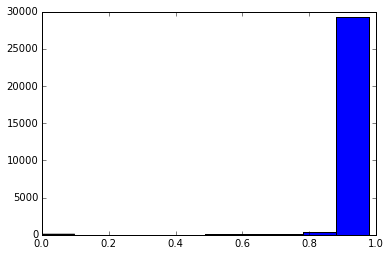

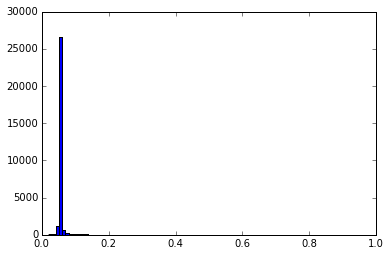

In [12]:
pred = clf.predict_proba(Xtest)
plt.hist(pred[:,0])
plt.figure()
plt.hist(pred[:,1],100)

In [36]:
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [37]:
y_true = ytest
y_scores = clfPoly.predict_proba(Xtest)[:,1]
print y_true.shape, y_scores.shape
auroc = roc_auc_score(y_true, y_scores)

print auroc

(30000,) (30000,)
0.611912832625


#3. Evaluate Model
    Learning Curve

In [12]:
def learningCurve(listOfNum, Xtrain, ytrain, Xcv, ycv, C = 1):
    '''
        prints learning curve
    returns: None
    '''
    accuracyTList = []
    accuracyCvList = []
    fscoreTList = []
    fscoreCvList = []
    
    clf = LogisticRegression(C = C)
    
    for i in listOfNum:
        # slice training examples       
        Xt_part = Xtrain.iloc[0:i,:]
        yt_part = ytrain.iloc[0:i]
        
        # train
        clf.fit(Xt_part, yt_part)
        
        # predict & get accuracy
        accuracy, precision, recall, fscore = getMeasures(yt_part, \
                                                  getPrediction(clf, Xt_part))
        accuracyCv, precisionCv, recallCv, fscoreCv = getMeasures(ycv, \
                                                  getPrediction(clf, Xcv))
        
        accuracyTList.append(accuracy)
        accuracyCvList.append(accuracyCv)
        fscoreTList.append(fscore)
        fscoreCvList.append(fscoreCv)
        
        print accuracy, accuracyCv

    # plot learning curve
    plt.plot(listOfNum, accuracyTList, label = 'Accuracy Train')
    plt.plot(listOfNum, accuracyCvList, label = 'Accuracy Cv')
    #plt.plot(listOfNum, fscoreTList, label = 'Fscore Train')
    #plt.plot(listOfNum, fscoreCvList, label = 'Fscore Cv')
    
    plt.legend(loc='best')
    plt.xticks(rotation=70) 
    plt.xlabel("# of train data")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve")
    
    
    return

0.98 0.931166666667
0.937647058824 0.931733333333
0.93495049505 0.932033333333
0.934370860927 0.932366666667
0.93368159204 0.932766666667
0.934780876494 0.932766666667
0.933687707641 0.932766666667
0.933703703704 0.932666666667
0.934064837905 0.932733333333
0.933680709534 0.932733333333
0.934111776447 0.9328
0.934083484574 0.9328
0.933793677205 0.932666666667
0.934055299539 0.9327
0.934194008559 0.932766666667
0.934167776298 0.932666666667
0.93429463171 0.932733333333
0.93428907168 0.9327


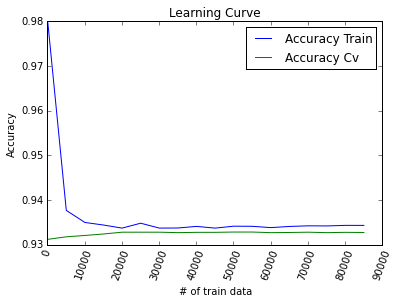

In [92]:
learningCurve(range(100, 90000, 5000), Xtrain, ytrain, Xcv, ycv, C = 1)

# 4. MODIFY MODEL
    1. Modify Threshold
    2. Add polynomial features
    3. Modify C (regularization term)
    4. Modified Model

###1. Modify Threshold

In [13]:
# 3. Threshold

def bestThreshold(listOfNum, Xtrain, ytrain, Xcv, ycv, C):
    '''
    returns: float, best Threshold
    '''
    fscoreList = []
    accuracyList = []

    for i in listOfNum:

        # 1 train
        clf = SVC(probability = True, C = C)
        clf.fit(Xtrain, ytrain)

        # 2 get measures
        accuracy, precision, recall, fscore = getMeasures(ycv, \
                                                          getPrediction(clf, Xcv, threshold = i))

        fscoreList.append(fscore)
        accuracyList.append(accuracy)

        print "\nWhen Threshold is %f, accuracy is %f and fscore is %f." % (i, accuracy, fscore)

    # plot learning curve
    plt.plot(listOfNum, fscoreList, label = 'F-score')
    plt.plot(listOfNum, accuracyList, label = 'Accuracy')

    plt.legend(loc='best')
    plt.xticks(rotation=70) 
    plt.xlabel("Threshold")
    plt.ylabel("F-score")
    plt.title("Threshold - F-score relationship")
    
    maxFscore = max(fscoreList)
    maxIndex = fscoreList.index(maxFscore)

    return listOfNum[maxIndex]

[0 1]
[[ 0.94032491  0.05967509]
 [ 0.94175631  0.05824369]
 [ 0.94607045  0.05392955]
 ..., 
 [ 0.94221744  0.05778256]
 [ 0.9452136   0.0547864 ]
 [ 0.94240569  0.05759431]]

When Threshold is 0.000000, accuracy is 0.068300 and fscore is 0.127867.
[0 1]
[[ 0.9391245   0.0608755 ]
 [ 0.94036984  0.05963016]
 [ 0.94415032  0.05584968]
 ..., 
 [ 0.94077196  0.05922804]
 [ 0.9433961   0.0566039 ]
 [ 0.94093625  0.05906375]]

When Threshold is 0.025000, accuracy is 0.068333 and fscore is 0.127871.
[0 1]
[[ 0.93937541  0.06062459]
 [ 0.94077328  0.05922672]
 [ 0.94499459  0.05500541]
 ..., 
 [ 0.9412239   0.0587761 ]
 [ 0.94415516  0.05584484]
 [ 0.94140789  0.05859211]]

When Threshold is 0.050000, accuracy is 0.084133 and fscore is 0.125636.
[0 1]
[[ 0.93947464  0.06052536]
 [ 0.94086915  0.05913085]
 [ 0.94508043  0.05491957]
 ..., 
 [ 0.94131869  0.05868131]
 [ 0.94424299  0.05575701]
 [ 0.94150224  0.05849776]]

When Threshold is 0.075000, accuracy is 0.928667 and fscore is 0.371328.


/Users/hee/.pyenv/versions/2.7.9/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


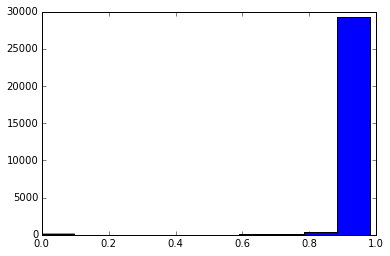

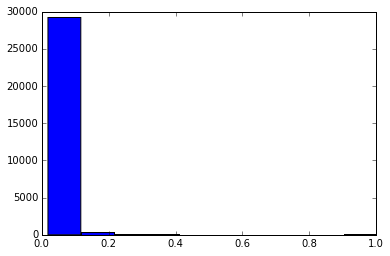

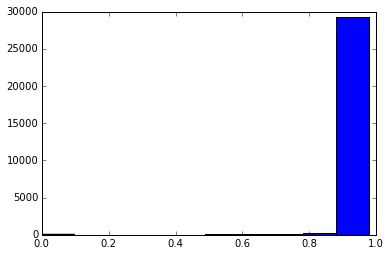

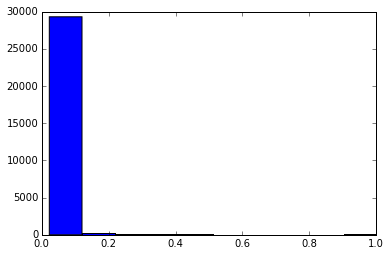

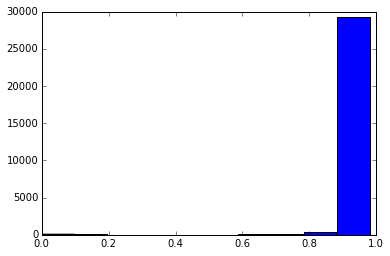

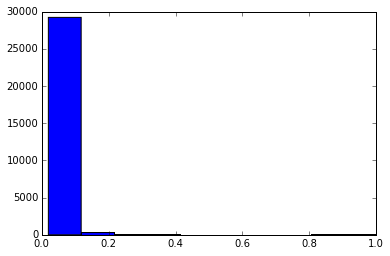

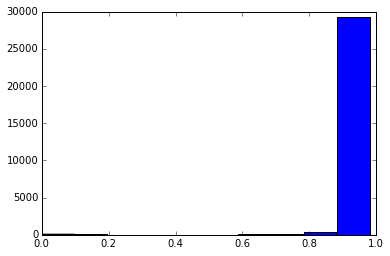

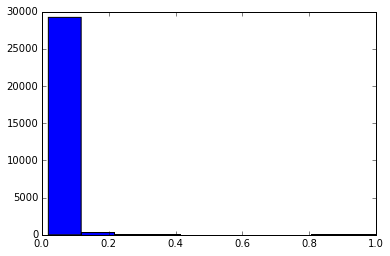

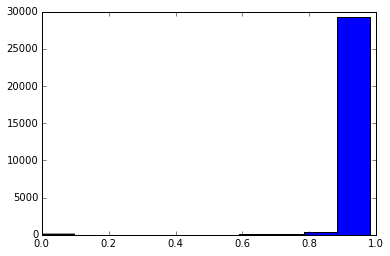

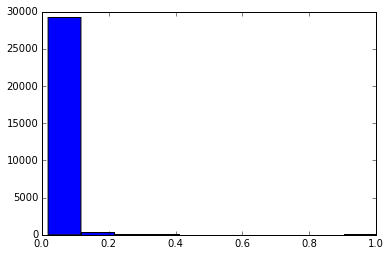

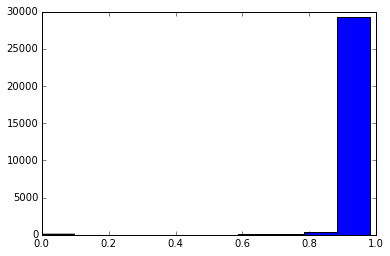

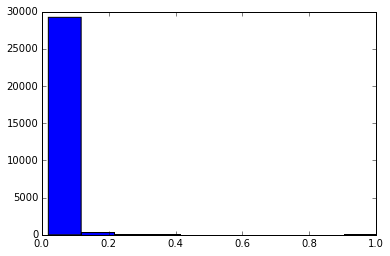

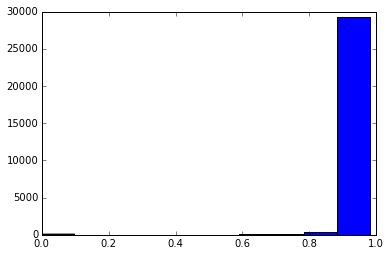

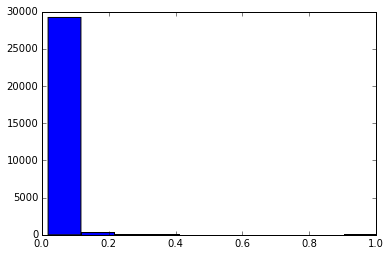

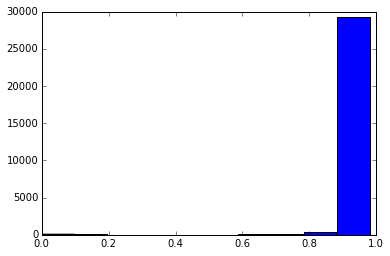

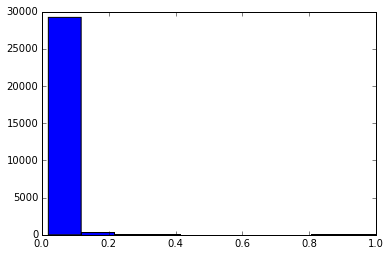

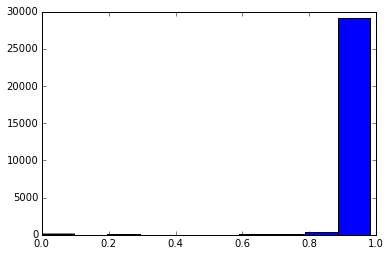

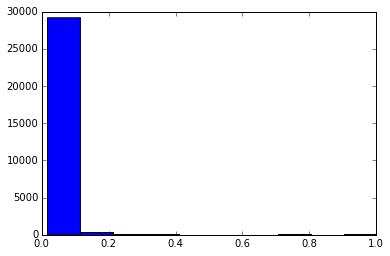

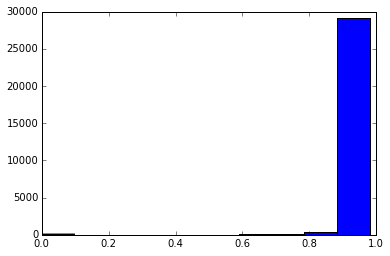

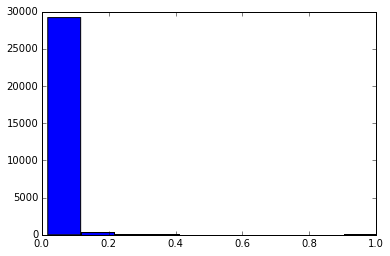

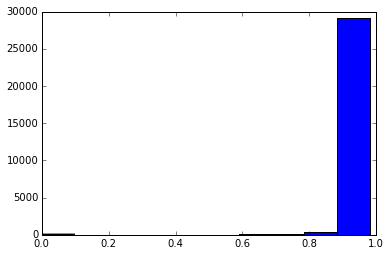

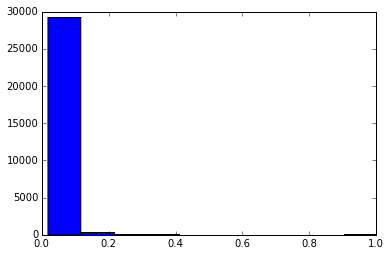

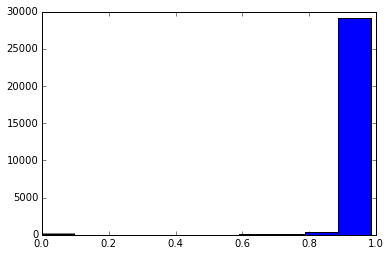

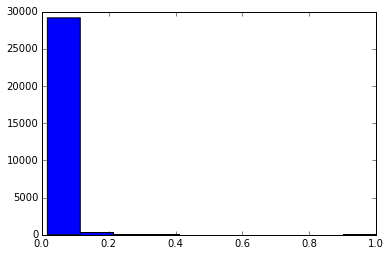

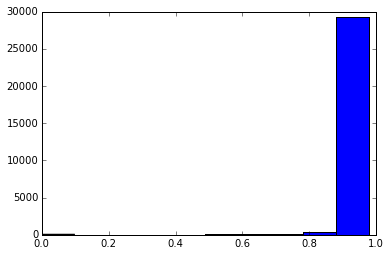

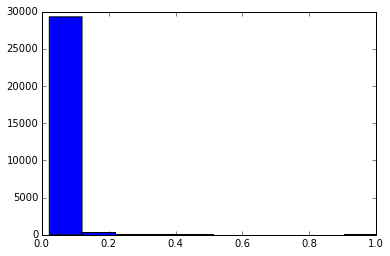

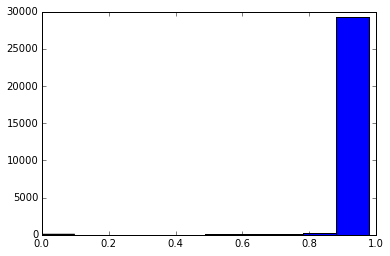

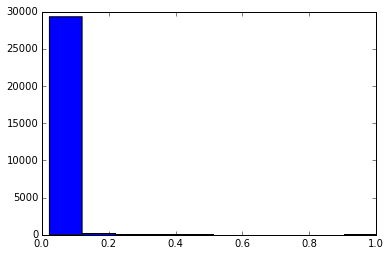

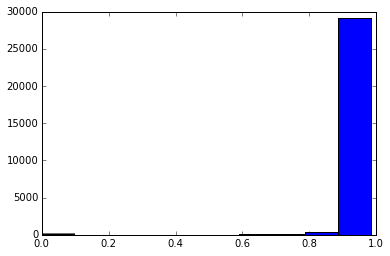

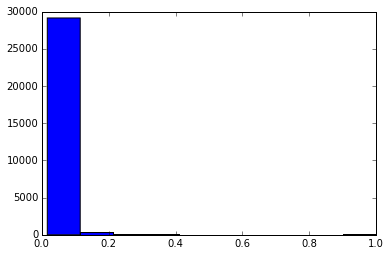

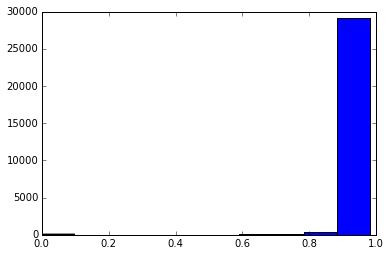

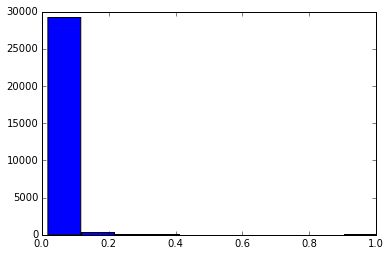

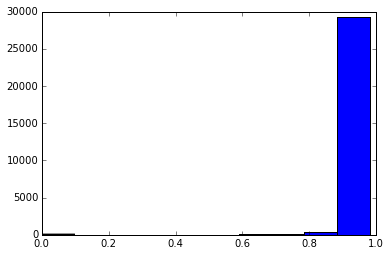

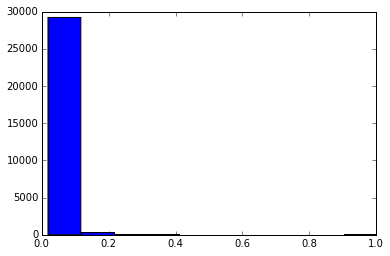

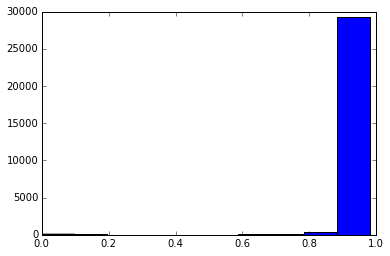

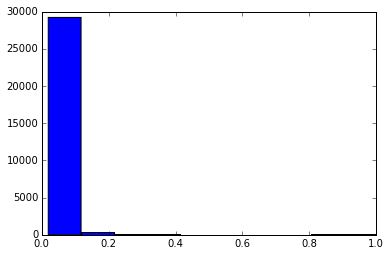

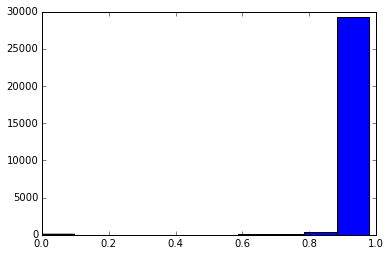

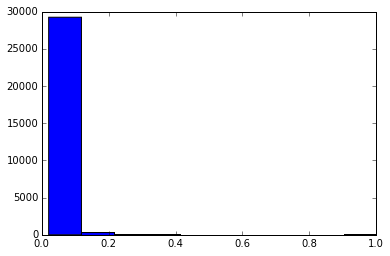

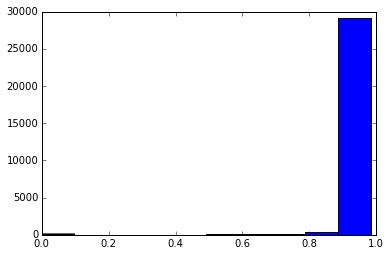

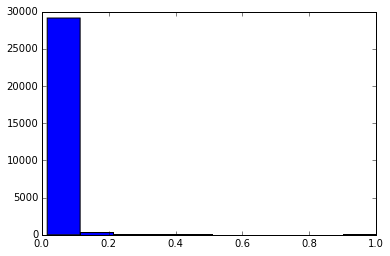

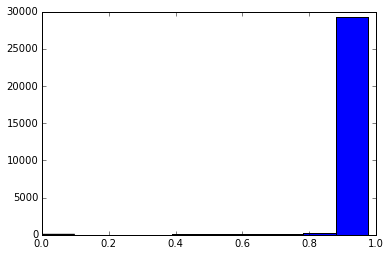

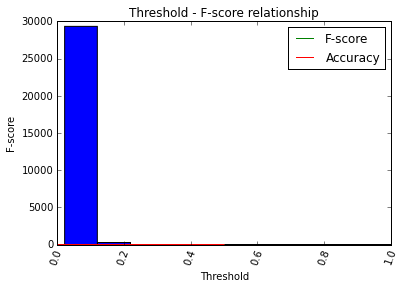

In [14]:
bestT = bestThreshold(np.linspace(0, 0.5, 21), Xtrain, ytrain, Xcv, ycv, C = 2)
print '\nThreshold that maximizes F-score >>', bestT

###2. Optimize Kernel
        1) rbf
        2) poly
        3) linear
        4) sigmoid
        5) precomputed

In [19]:
# 2) find optimum polynomial degree

def bestKernel(listOfKernel, Xtrain, ytrain, Xcv, ycv, C = 1, threshold = 0.5):
    '''
        prints Kernel - F-score relationship
    returns: int, best kernel
    '''
    
    accuracyList = []
    fscoreList = []

    for i in listOfKernel:
        print 'Kernel: %d' % i

        # 2 train
        clf = SVC(probability = True, C = C)
        clf.fit(Xtrain, ytrain)

        # 3 get measures
        accuracy, precision, recall, fscore = getMeasures(ycv, getPrediction(clf, Xcv, threshold))
        
        accuracyList.append(accuracy)
        fscoreList.append(fscore)
    
    # plot relationship
    plt.figure()
    plt.plot(listOfKernel, fscoreList, label = 'F-score')
    plt.plot(listOfKernel, accuracyList, label = 'Accuracy')

    plt.legend(loc='best')
    plt.xticks(rotation=70) 
    plt.xlabel("Polynomial term")
    plt.ylabel("F-score")
    plt.title("Polynomial term - F-score relationship")
    
    maxFscore = max(fscoreList)
    maxIndex = fscoreList.index(maxFscore)
    
    return listOfNum[maxIndex]

In [ ]:
plt.plot(['a','b'], [1, 1000])

Polynomial 1
[0 1]
[[ 0.89921159  0.10078841]
 [ 0.90293248  0.09706752]
 [ 0.95968536  0.04031464]
 ..., 
 [ 0.96268114  0.03731886]
 [ 0.95548924  0.04451076]
 [ 0.95748689  0.04251311]]
Polynomial 2
[0 1]
[[ 0.88789541  0.11210459]
 [ 0.89115306  0.10884694]
 [ 0.9541027   0.0458973 ]
 ..., 
 [ 0.96497391  0.03502609]
 [ 0.96101806  0.03898194]
 [ 0.96150303  0.03849697]]
Polynomial 3
[0 1]
[[ 0.61666629  0.38333371]
 [ 0.55314642  0.44685358]
 [ 0.55265241  0.44734759]
 ..., 
 [ 0.56014181  0.43985819]
 [ 0.5464128   0.4535872 ]
 [ 0.54217385  0.45782615]]

Polynomial term that maximizes F-score >> 2


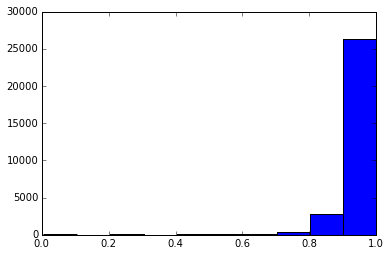

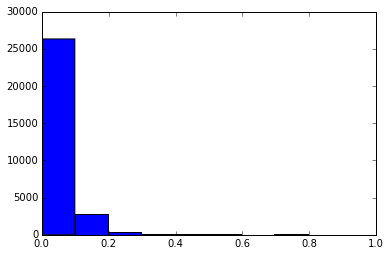

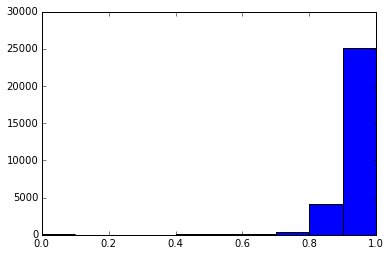

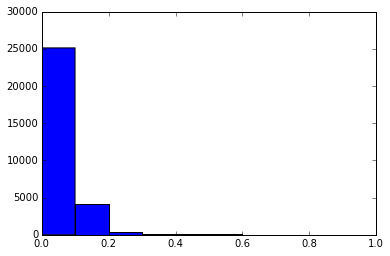

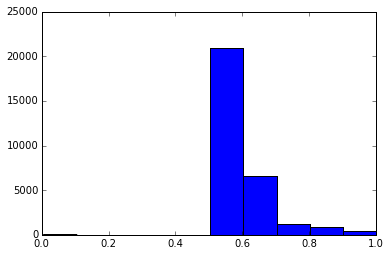

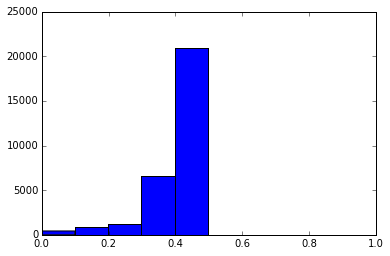

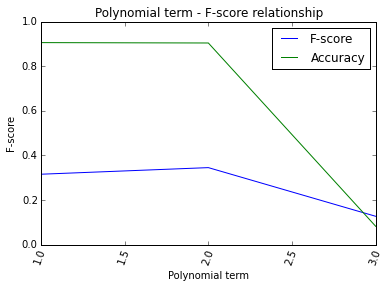

In [20]:
bestP = bestPoly(['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], Xtrain, ytrain, Xcv, ycv, \
                 C = 1, threshold = bestT)
print '\nPolynomial term that maximizes F-score >>', bestP

In [17]:
# poly 2 kernel 
clfPoly = SVC(probability = True, kernel = 'poly', degree = 2)
clfPoly.fit(Xtrain, ytrain)

pred = clfPoly.predict(Xtest)

# get measures
measures = getMeasures(ytest, pred)
accuracy, precision, recall, fscore = measures
    
print '\naccuracy', accuracy
print 'precision', precision
print 'recall', recall
print 'fscore', fscore


accuracy 0.9331
precision 0.454545454545
recall 0.0024925224327
fscore 0.00495785820526


In [15]:
# poly 3 kernel 
clfPoly = SVC(probability = True, kernel = 'poly')
clfPoly.fit(Xtrain, ytrain)

pred = clfPoly.predict(Xtest)

# get measures
measures = getMeasures(ytest, pred)
accuracy, precision, recall, fscore = measures
    
print '\naccuracy', accuracy
print 'precision', precision
print 'recall', recall
print 'fscore', fscore


accuracy 0.9329
precision 0.387096774194
recall 0.00598205383848
fscore 0.0117820324006


[0 1]
[[ 0.934921    0.065079  ]
 [ 0.93492409  0.06507591]
 [ 0.93491994  0.06508006]
 ..., 
 [ 0.93492275  0.06507725]
 [ 0.93492219  0.06507781]
 [ 0.93492101  0.06507899]]

accuracy 0.933066666667
precision 0.428571428571
recall 0.00299102691924
fscore 0.00594059405941

[0 0 0 ..., 0 0 0]


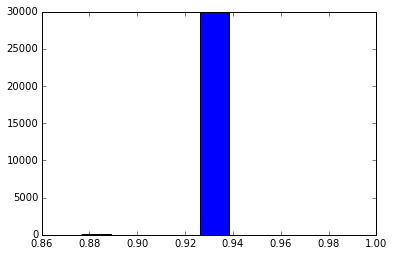

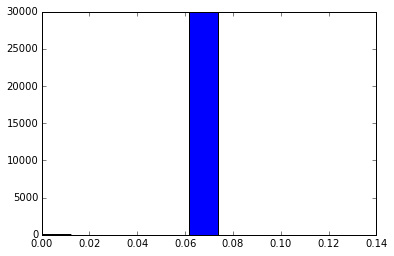

In [30]:
# poly 3 kernel 
clfPoly3 = SVC(probability = True, kernel = 'poly')
clfPoly3.fit(Xtrain, ytrain)

prediction = predict(clfPoly3, Xtest, ytest, threshold = bestT)
print '\n', prediction

Threshold 0.0
[0 1]
[[ 0.934921    0.065079  ]
 [ 0.93492409  0.06507591]
 [ 0.93491994  0.06508006]
 ..., 
 [ 0.93492275  0.06507725]
 [ 0.93492219  0.06507781]
 [ 0.93492101  0.06507899]]

accuracy 0.0668666666667
precision 0.0668666666667
recall 1.0
fscore 0.125351496594

[1 1 1 ..., 1 1 1]
Threshold 0.025
[0 1]
[[ 0.934921    0.065079  ]
 [ 0.93492409  0.06507591]
 [ 0.93491994  0.06508006]
 ..., 
 [ 0.93492275  0.06507725]
 [ 0.93492219  0.06507781]
 [ 0.93492101  0.06507899]]

accuracy 0.0670333333333
precision 0.0668778129688
recall 1.0
fscore 0.125371082154

[1 1 1 ..., 1 1 1]
Threshold 0.05
[0 1]
[[ 0.934921    0.065079  ]
 [ 0.93492409  0.06507591]
 [ 0.93491994  0.06508006]
 ..., 
 [ 0.93492275  0.06507725]
 [ 0.93492219  0.06507781]
 [ 0.93492101  0.06507899]]

accuracy 0.0671666666667
precision 0.0668867326865
recall 1.0
fscore 0.125386755008

[1 1 1 ..., 1 1 1]
Threshold 0.075
[0 1]
[[ 0.934921    0.065079  ]
 [ 0.93492409  0.06507591]
 [ 0.93491994  0.06508006]
 ..., 
 [

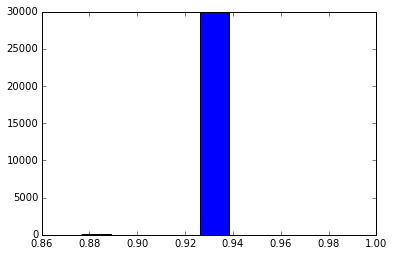

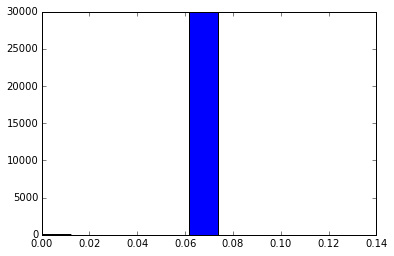

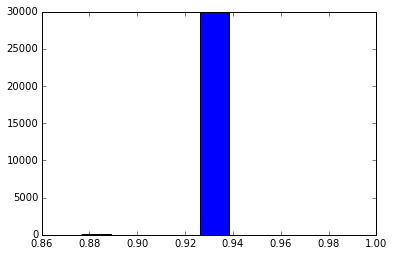

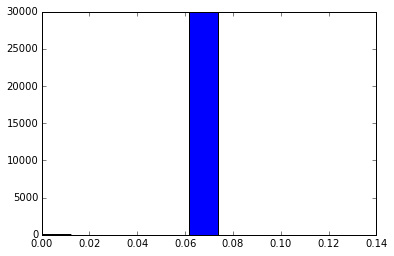

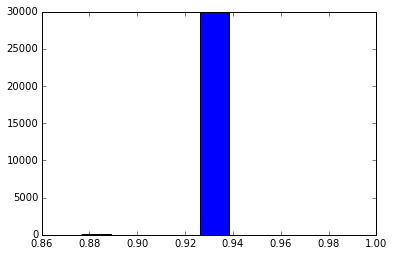

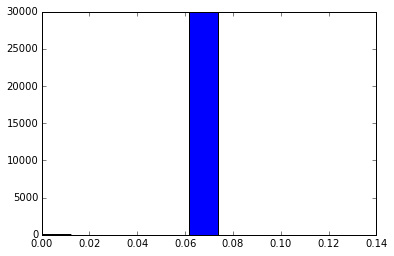

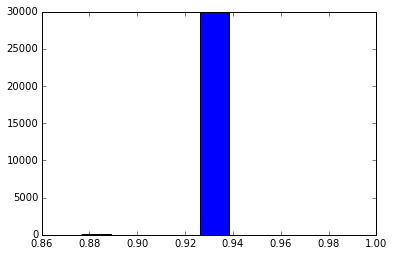

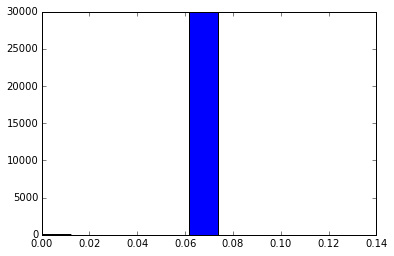

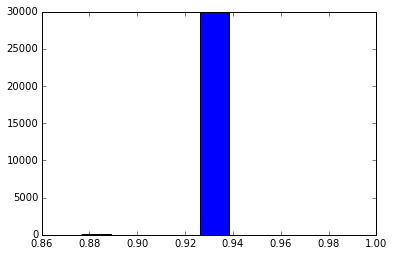

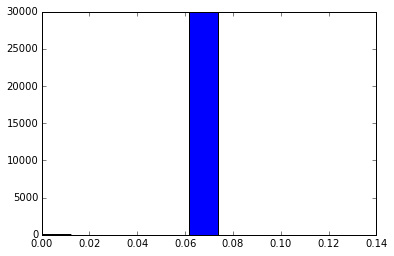

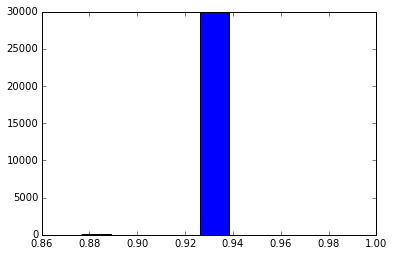

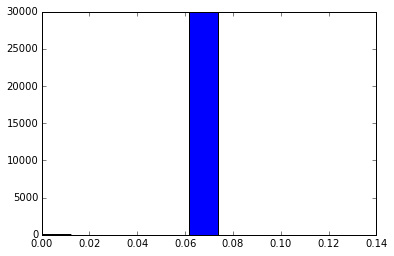

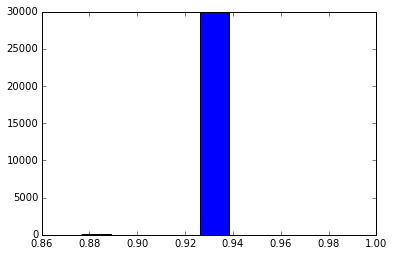

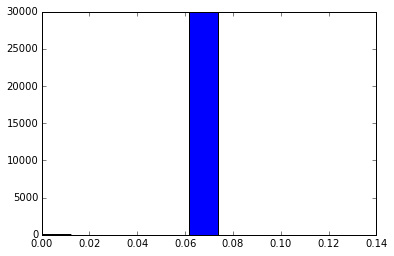

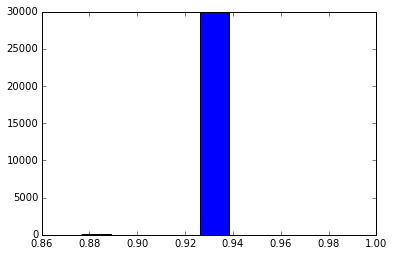

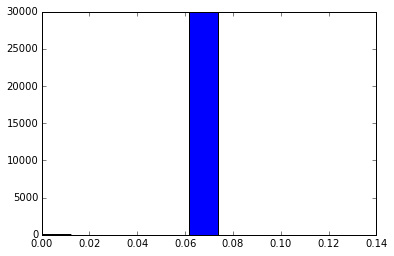

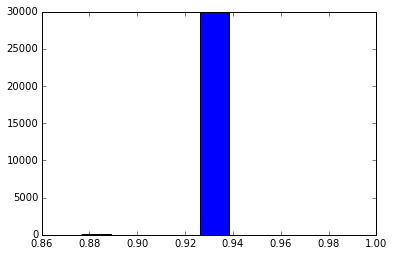

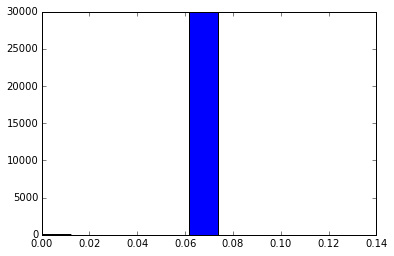

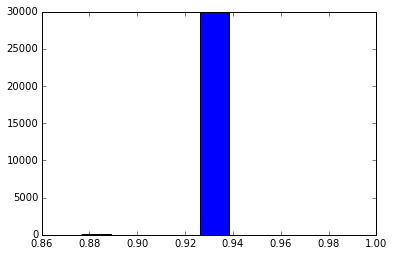

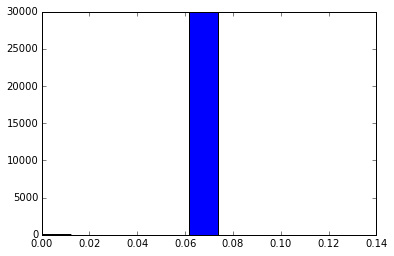

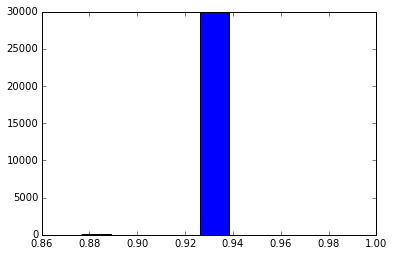

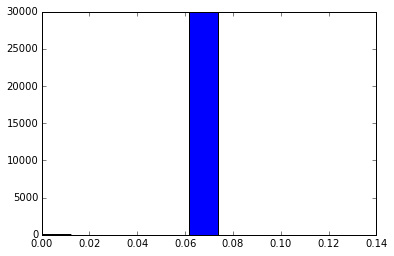

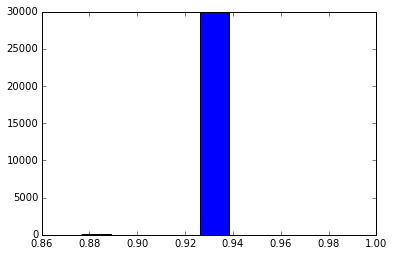

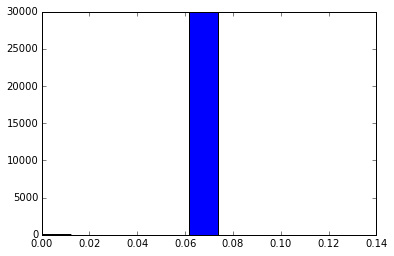

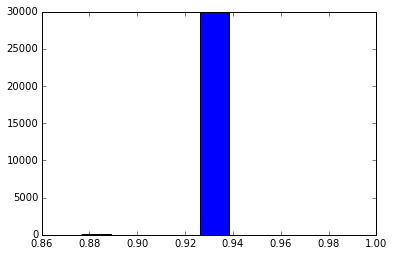

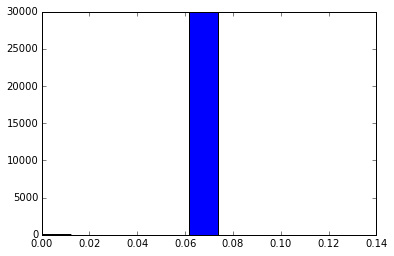

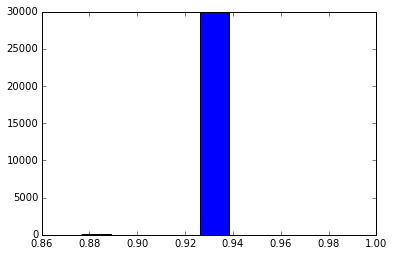

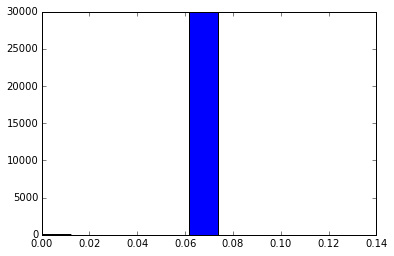

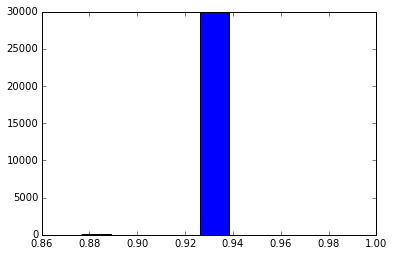

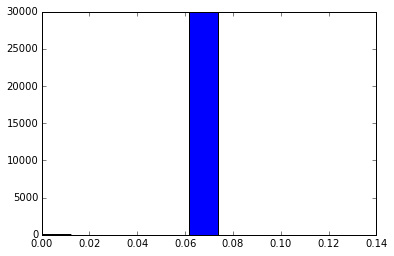

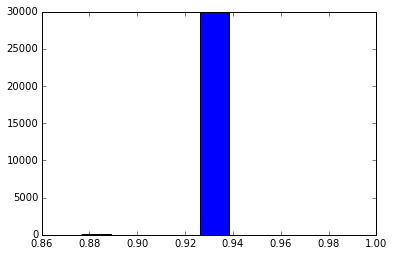

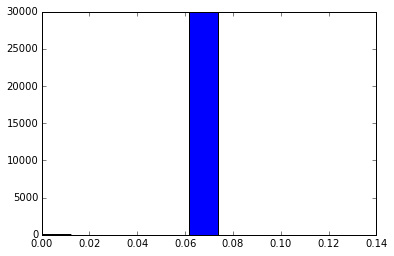

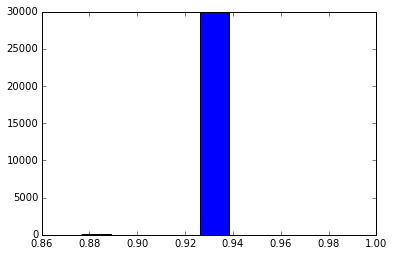

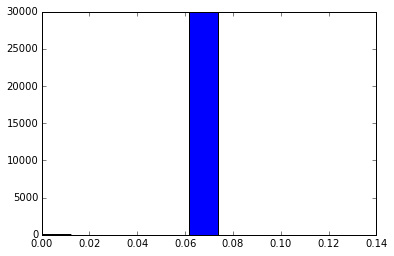

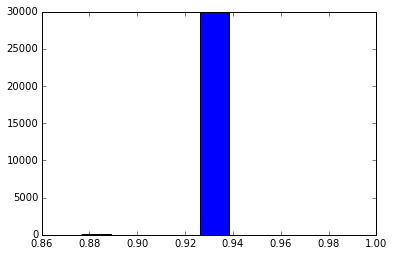

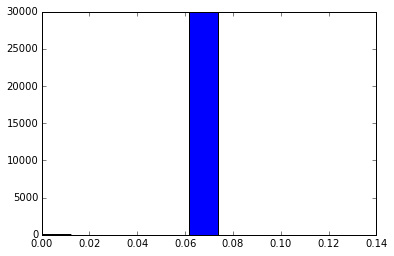

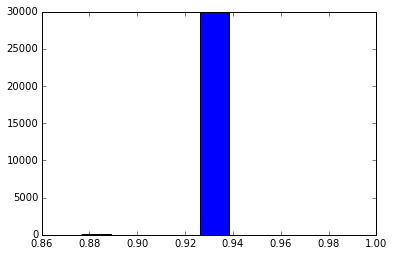

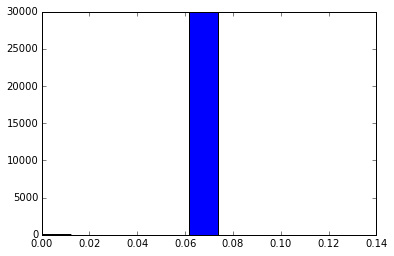

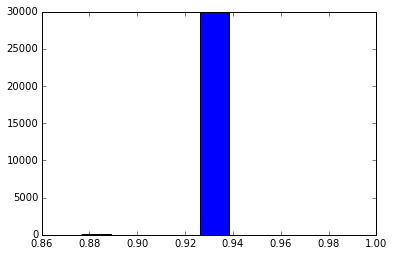

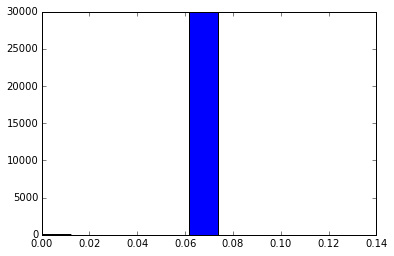

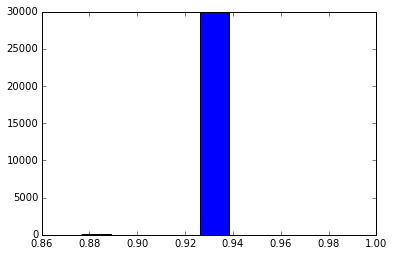

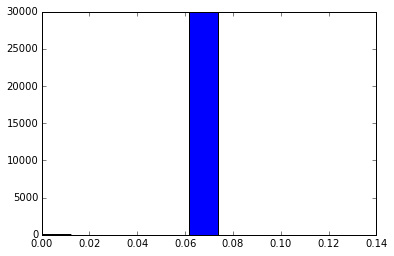

In [32]:
for i in np.linspace(0, 0.5, 21):
    print 'Threshold', i
    prediction = predict(clfPoly3, Xtest, ytest, threshold = i)
    print '\n', prediction

In [33]:
from sklearn.metrics import roc_auc_score
y_true = ytest
y_scores = clfPoly3.predict_proba(Xtest)[:,1]
print y_true.shape, y_scores.shape
auroc = roc_auc_score(y_true, y_scores)

print auroc

(30000,) (30000,)
0.649930361804


In [23]:
# poly 4 kernel 
clfPoly = SVC(probability = True, kernel = 'poly', degree = 4)
clfPoly.fit(Xtrain, ytrain)

pred = clfPoly.predict(Xtest)

# get measures
measures = getMeasures(ytest, pred)
accuracy, precision, recall, fscore = measures
    
print '\naccuracy', accuracy
print 'precision', precision
print 'recall', recall
print 'fscore', fscore


accuracy 0.9332
precision 0.513513513514
recall 0.0189431704885
fscore 0.0365384615385


In [34]:
clfPoly

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=4, gamma=0.0,
  kernel='poly', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [35]:
y_true = ytest
y_scores = clfPoly.predict_proba(Xtest)[:,1]
print y_true.shape, y_scores.shape
auroc = roc_auc_score(y_true, y_scores)

print auroc

(30000,) (30000,)
0.611912832625


In [28]:
bestT

0.075000000000000011

[0 1]
[[ 0.93496809  0.06503191]
 [ 0.9349588   0.0650412 ]
 [ 0.93495791  0.06504209]
 ..., 
 [ 0.93498448  0.06501552]
 [ 0.93495743  0.06504257]
 [ 0.93495945  0.06504055]]

accuracy 0.932966666667
precision 0.424242424242
recall 0.00697906281157
fscore 0.0137322216773

[0 0 0 ..., 0 0 0]


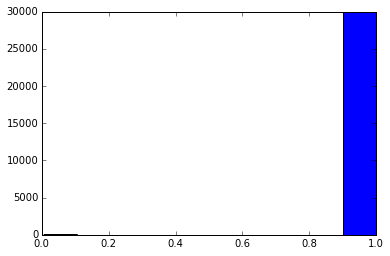

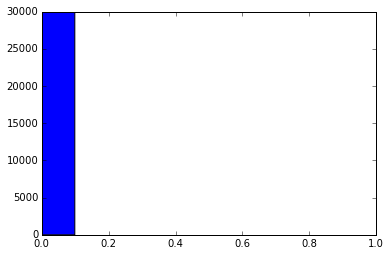

In [29]:
prediction = predict(clfPoly, Xtest, ytest, threshold = bestT)
print '\n', prediction

[0 1]
[[ 0.93496809  0.06503191]
 [ 0.9349588   0.0650412 ]
 [ 0.93495791  0.06504209]
 ..., 
 [ 0.93498448  0.06501552]
 [ 0.93495743  0.06504257]
 [ 0.93495945  0.06504055]]

accuracy 0.932966666667
precision 0.424242424242
recall 0.00697906281157
fscore 0.0137322216773

[0 0 0 ..., 0 0 0]


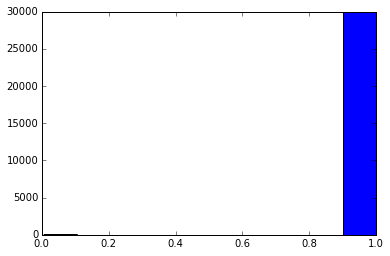

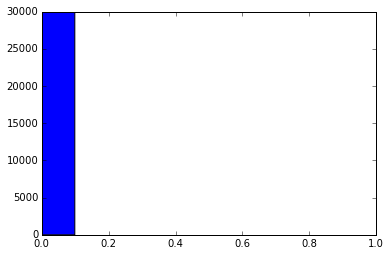

In [25]:
prediction = predict(clfPoly, Xtest, ytest, threshold = bestT)
print '\n', prediction

[0 1]
[[ 0.93496809  0.06503191]
 [ 0.9349588   0.0650412 ]
 [ 0.93495791  0.06504209]
 ..., 
 [ 0.93498448  0.06501552]
 [ 0.93495743  0.06504257]
 [ 0.93495945  0.06504055]]

accuracy 0.933133333333
precision 0.5
recall 0.0024925224327
fscore 0.00496031746032

[0 0 0 ..., 0 0 0]


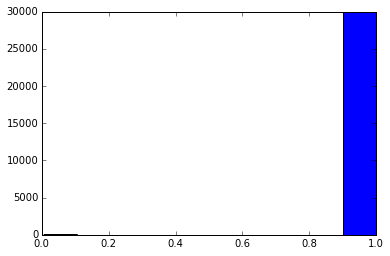

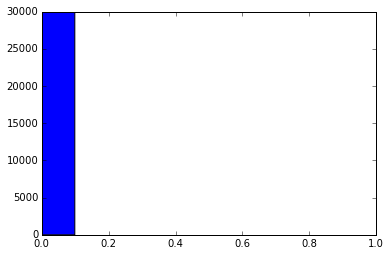

In [26]:
prediction = predict(clfPoly, Xtest, ytest, threshold = 0.5)
print '\n', prediction

In [18]:
# sigmoid kernel 
clfSig = SVC(probability = True, kernel = 'sigmoid')
clfSig.fit(Xtrain, ytrain)

pred = clfSig.predict(Xtest)

# get measures
measures = getMeasures(ytest, pred)
accuracy, precision, recall, fscore = measures
    
print '\naccuracy', accuracy
print 'precision', precision
print 'recall', recall
print 'fscore', fscore


accuracy 0.933133333333
precision 0.0
recall 0.0
fscore 0.0


/Users/hee/.pyenv/versions/2.7.9/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
# precomputed
clfPre = SVC(probability = True, kernel = 'linear')
clfPre.fit(Xtrain, ytrain)

pred = clfPre.predict(Xtest)

# get measures
measures = getMeasures(ytest, pred)
accuracy, precision, recall, fscore = measures
    
print '\naccuracy', accuracy
print 'precision', precision
print 'recall', recall
print 'fscore', fscore


accuracy 0.933133333333
precision 0.0
recall 0.0
fscore 0.0


###3. Modify C (regularization term)

In [21]:
# 3. Modify C

def bestC(listOfNum, Xtrain, ytrain, Xcv, ycv, threshold = 0.5):
    accuracyList = []
    fscoreList = []
    
    for i in listOfNum:

        # 1 train
        clf = LogisticRegression(C = i)
        clf.fit(Xtrain, ytrain)

        # 2 get measures
        accuracy, precision, recall, fscore = getMeasures(ycv, \
                                                          getPrediction(clf, Xcv, threshold))
        accuracyList.append(accuracy)
        fscoreList.append(fscore)

        print '\nWhen C = %d, accuracy is %f and f-score is %f.' % (i, accuracy, fscore)
    
    # plot relationship
    plt.figure()
    plt.plot(listOfNum, fscoreList, label = 'F-score')
    plt.plot(listOfNum, accuracyList, label = 'Accuracy')

    plt.legend(loc='best')
    plt.xticks(rotation=70) 
    plt.xlabel("C")
    plt.ylabel("F-score")
    plt.title("C - F-score relationship")

    maxFscore = max(fscoreList)
    maxIndex = fscoreList.index(maxFscore)

    return listOfNum[maxIndex]

[0 1]
[[ 0.88824954  0.11175046]
 [ 0.89137608  0.10862392]
 [ 0.95408751  0.04591249]
 ..., 
 [ 0.96496549  0.03503451]
 [ 0.96099681  0.03900319]
 [ 0.96149334  0.03850666]]

When C = 1, accuracy is 0.904100 and f-score is 0.345690.
[0 1]
[[ 0.92582886  0.07417114]
 [ 0.92541112  0.07458888]
 [ 0.96281562  0.03718438]
 ..., 
 [ 0.96799411  0.03200589]
 [ 0.96489082  0.03510918]
 [ 0.96370105  0.03629895]]

When C = 2, accuracy is 0.910967 and f-score is 0.404725.
[0 1]
[[ 0.93097284  0.06902716]
 [ 0.93054095  0.06945905]
 [ 0.9677383   0.0322617 ]
 ..., 
 [ 0.97224066  0.02775934]
 [ 0.96863801  0.03136199]
 [ 0.96726824  0.03273176]]

When C = 3, accuracy is 0.909600 and f-score is 0.414002.
[0 1]
[[ 0.89505909  0.10494091]
 [ 0.89607243  0.10392757]
 [ 0.95365668  0.04634332]
 ..., 
 [ 0.96466298  0.03533702]
 [ 0.96050801  0.03949199]
 [ 0.96123489  0.03876511]]

When C = 4, accuracy is 0.910767 and f-score is 0.358187.
[0 1]
[[ 0.89144388  0.10855612]
 [ 0.89351233  0.10648767]


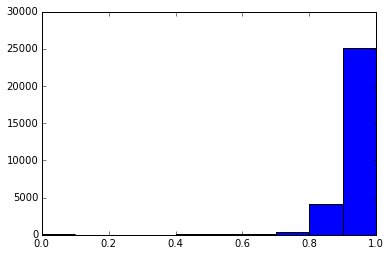

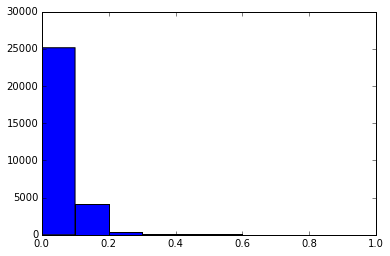

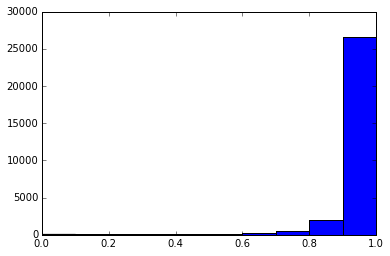

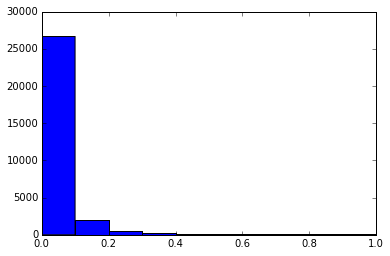

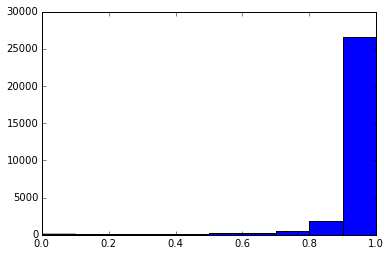

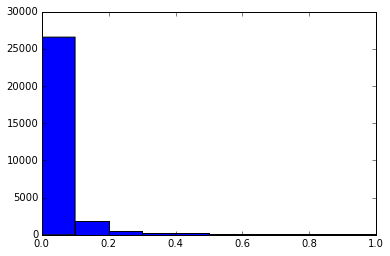

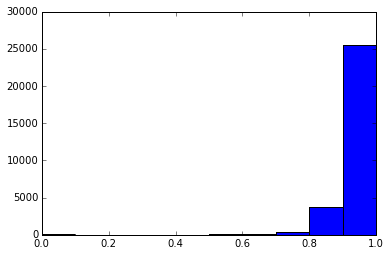

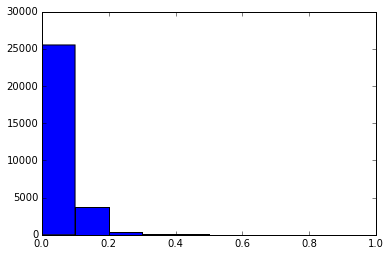

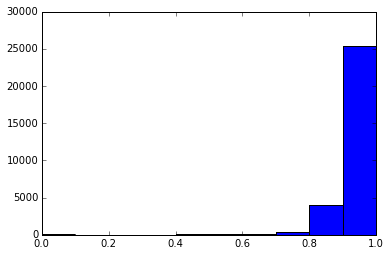

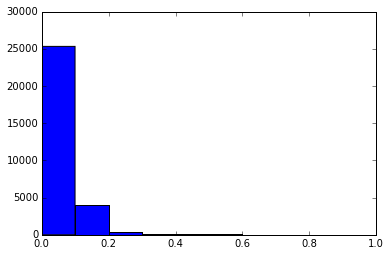

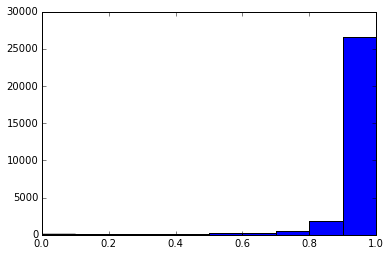

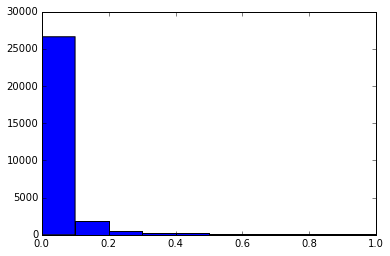

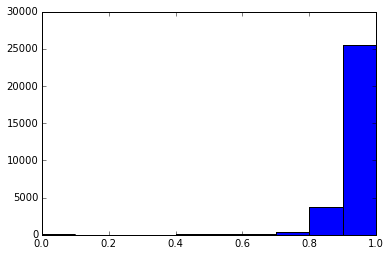

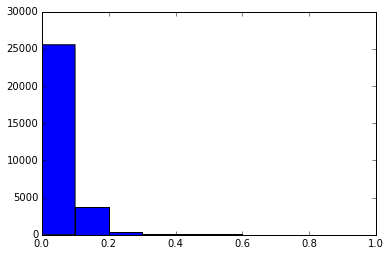

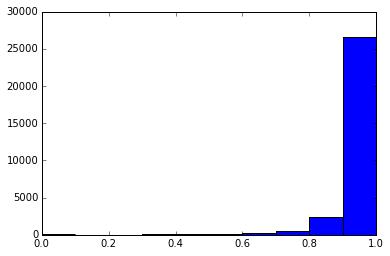

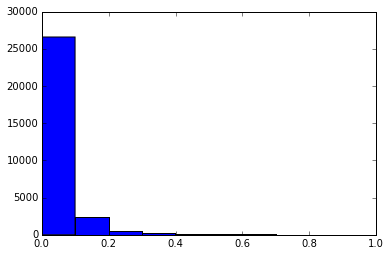

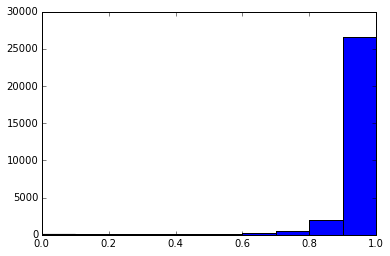

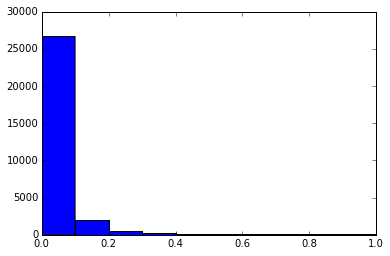

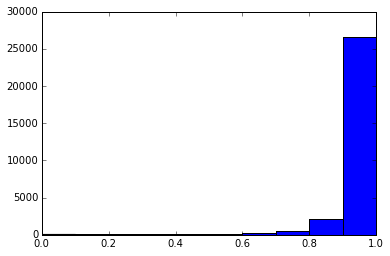

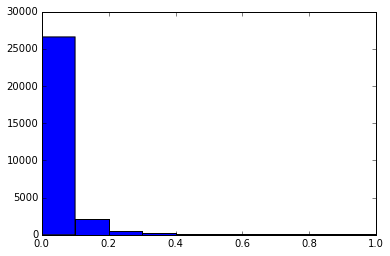

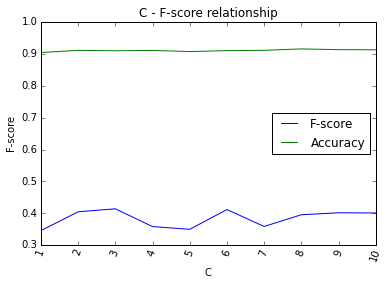

In [22]:
XtrainPoly = polyFeature(bestP, Xtrain)
XcvPoly = polyFeature(bestP, Xcv)

bestc = bestC(np.linspace(1, 10, 10), XtrainPoly, ytrain, XcvPoly, ycv, threshold = bestT)
print '\nC that maximizes F-score >>', bestc

### 4. Modified Model
    Train again with modified parameters
    (Higher f-score expected, in sacrifice of accuracy)
    1. Modified Threshold: 0.125
    2. Modified Polynomial Term: 2
    3. Modified C: 3

[0 1]
[[ 0.72347191  0.27652809]
 [ 0.9752811   0.0247189 ]
 [ 0.96431433  0.03568567]
 ..., 
 [ 0.91913798  0.08086202]
 [ 0.92066416  0.07933584]
 [ 0.97249043  0.02750957]]

accuracy 0.909433333333
precision 0.361295357004
recall 0.461615154536
fscore 0.405340337054


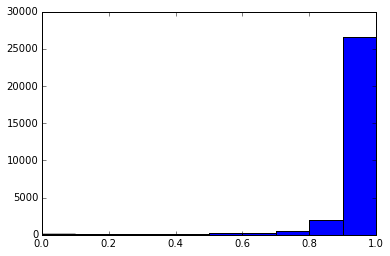

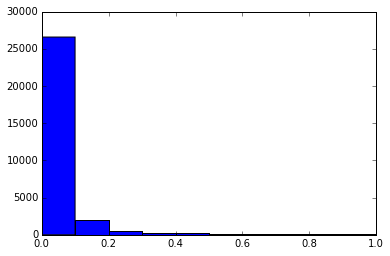

In [23]:
# 1. Modified Threshold: 0.125
bestT

# 2. Modified polynomial degree: 2
XtrainPoly = polyFeature(bestP, Xtrain)
XtestPoly = polyFeature(bestP, Xtest)

# 3. Modified C: 3
bestc

# Modified Model
    # Train
bestClf = LogisticRegression(C = bestc)
bestClf.fit(XtrainPoly, ytrain)

    # Predict
bestPrediction = predict(bestClf, XtestPoly, ytest, threshold = bestT)

In [24]:
bestClf.classes_

array([0, 1])

In [25]:
trainPoly = np.append(XtrainPoly, np.array(ytrain).reshape(90000,1), axis = 1)
np.savetxt('training_unbalanced_poly.csv', trainPoly, delimiter=',')